<a href="https://colab.research.google.com/github/michael020830/etf-data-analysis/blob/main/ETF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Drive 마운트를 시도합니다...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive 마운트 완료.
'/content/drive/MyDrive/Colab_Data' 디렉토리 확인 또는 생성 완료.

=== 포트폴리오 관리 프로그램 메뉴 ===
1. ETF 추천
2. 포트폴리오 최적화 시뮬레이션
3. 백테스팅
4. 포트폴리오 미래 예측 시뮬레이션 (몬테카를로)
5. 포트폴리오 관리 및 모니터링 (사후 관리)
exit. 프로그램 종료

원하는 메뉴 번호를 입력하세요: 3

=== 3단계: 동적 프로그래밍 정책 기반 백테스팅 ===

백테스팅을 위한 충분한 데이터나 동적 프로그래밍 정책이 없습니다. 2단계 '포트폴리오 최적화 시뮬레이션'을 먼저 실행해주세요.

=== 포트폴리오 관리 프로그램 메뉴 ===
1. ETF 추천
2. 포트폴리오 최적화 시뮬레이션
3. 백테스팅
4. 포트폴리오 미래 예측 시뮬레이션 (몬테카를로)
5. 포트폴리오 관리 및 모니터링 (사후 관리)
exit. 프로그램 종료

원하는 메뉴 번호를 입력하세요: 2
=== 2단계: 동적 프로그래밍 기반 포트폴리오 최적화 시뮬레이션 ===

최적화할 ETF 목록이 제공되지 않았습니다. 직접 입력하거나 ETF 추천을 먼저 진행해주세요.
최적화할 ETF 심볼을 입력해 주세요 (예: SPY, IVV, QQQ): SPY, IVV, QQQ

입력하신 ETF 심볼: ['SPY', 'IVV', 'QQQ']

--- 동적 프로그래밍을 위한 추가 정보 입력 ---
투자 기간을 입력해 주세요 (단위: 개월, 정수로 입력. 예: 12): 5
초기 투자 금액을 입력해 주세요 (숫자로만 입력. 예: 10000): 1000
위험 회피 계수를 입력해 주세요 (권장: 0.1 ~ 5.0 사이의 숫자, 높을수록 안정 지향)

[*********************100%***********************]  3 of 3 completed
/tmp/ipython-input-3620978807.py:288: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices = historical_prices.resample('M').last().dropna()



--- 과거 데이터 분석 결과 (연간 기준) ---
ETF별 예상 수익률 (로그 수익률 기반):
Ticker
IVV    0.135
QQQ    0.177
SPY    0.135
dtype: object

ETF별 예상 변동성 (로그 수익률 기반):
Ticker
IVV    0.153
QQQ    0.185
SPY    0.153
dtype: object

이제 동적 프로그래밍 알고리즘을 설계할 준비가 완료되었습니다.

[2단계] 동적 프로그래밍 모델 계산 시작 (역방향 진행)...
   기간 5 (월) 계산 중...
   기간 4 (월) 계산 중...
   기간 3 (월) 계산 중...
   기간 2 (월) 계산 중...
   기간 1 (월) 계산 중...

[2단계] 동적 프로그래밍 최적 정책 계산 완료.

[2단계] 최적 포트폴리오 시뮬레이션 (월별 리밸런싱):
   기간 1 (월): 시작 자본: 1000.00, 적용 가중치: [0.3 0.7 0. ], 거래 비용: 0.80, 종료 예상 자본: 1012.93
   기간 2 (월): 시작 자본: 1012.93, 적용 가중치: [0.3 0.7 0. ], 거래 비용: 0.00, 종료 예상 자본: 1026.84
   기간 3 (월): 시작 자본: 1026.84, 적용 가중치: [0.3 0.7 0. ], 거래 비용: 0.00, 종료 예상 자본: 1040.95
   기간 4 (월): 시작 자본: 1040.95, 적용 가중치: [0.3 0.7 0. ], 거래 비용: 0.00, 종료 예상 자본: 1055.25
   기간 5 (월): 시작 자본: 1055.25, 적용 가중치: [0.3 0.7 0. ], 거래 비용: 0.00, 종료 예상 자본: 1069.75

--- 최종 DP 시뮬레이션 결과 ---
최종 예상 자본: 1069.75
총 수익률: 0.0697
연 환산 포트폴리오 수익률: 0.1779
연 환산 포트폴리오 변동성: 0.1644
최종 샤프 비율: 0.8386

=== 포트폴리오 관리 프로그램 메뉴 ===
1. E

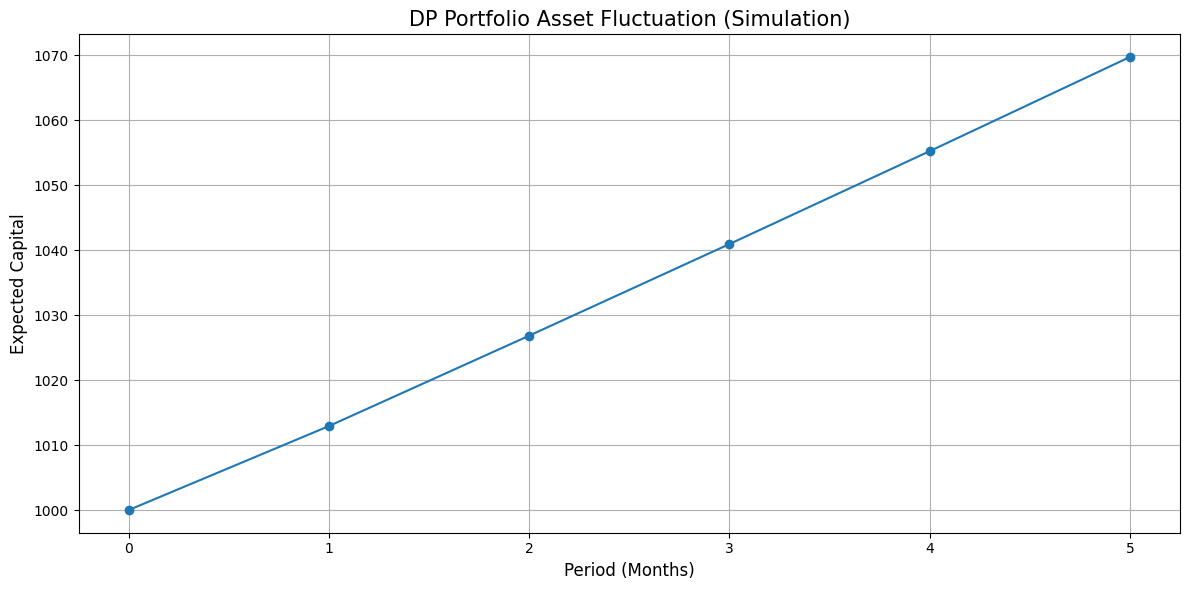

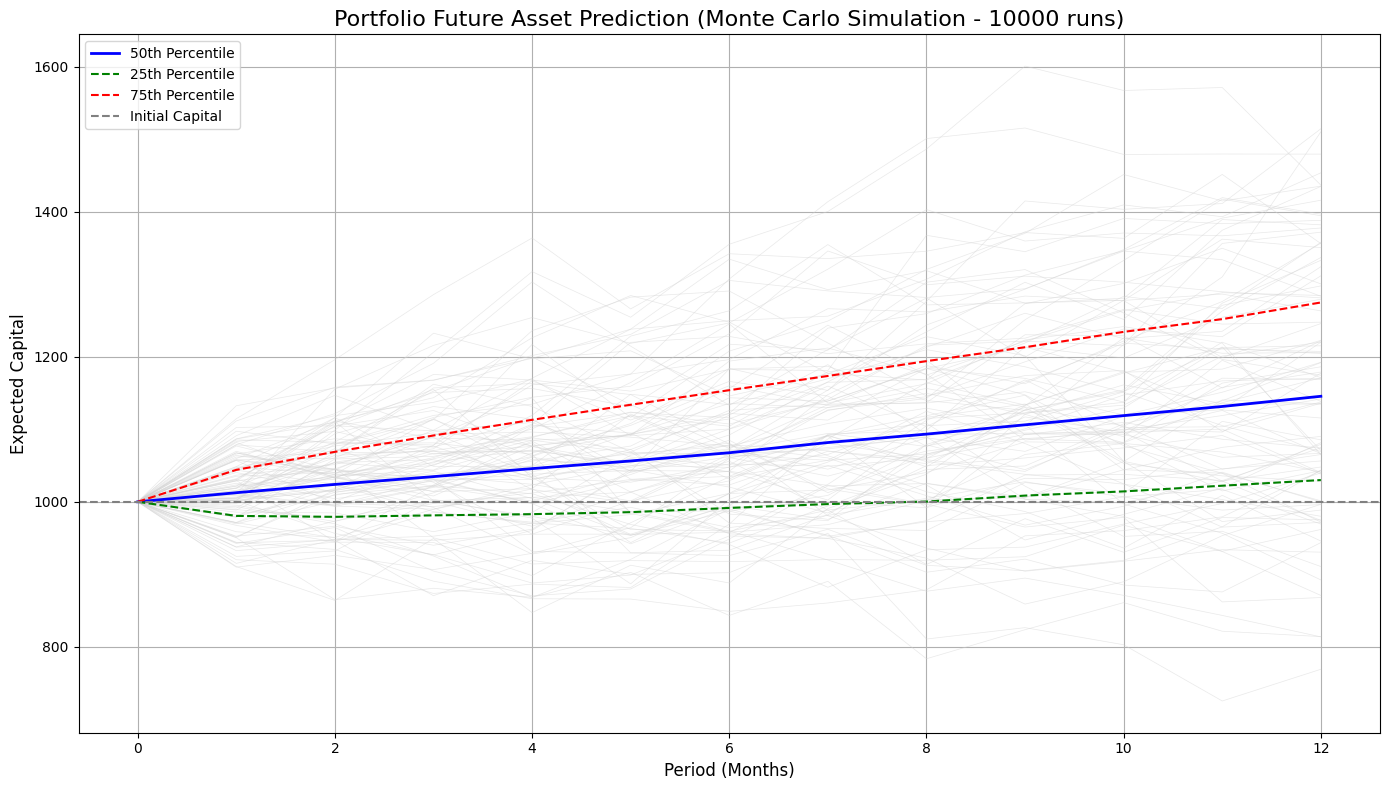

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
from dateutil.relativedelta import relativedelta
import os
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# pandas 출력 형식 설정
pd.options.display.float_format = '{:.3f}'.format

# Google Drive 마운트
def mount_google_drive(base_dir):
    """Google Drive를 마운트하고 지정된 디렉터리를 확인하거나 생성합니다."""
    print("Google Drive 마운트를 시도합니다...")
    try:
        drive.mount('/content/drive')
        print("Google Drive 마운트 완료.")
        os.makedirs(base_dir, exist_ok=True)
        print(f"'{base_dir}' 디렉토리 확인 또는 생성 완료.")
        return True
    except Exception as e:
        print(f"Google Drive 마운트 중 오류 발생: {e}")
        print("수동으로 마운트를 시도하거나, Colab 환경을 확인해주세요.")
        return False

# 데이터 로드 유틸리티 함수
def load_data(file_path, **kwargs):
    """지정된 경로에서 CSV 파일을 DataFrame으로 로드합니다."""
    try:
        df = pd.read_csv(file_path, **kwargs)
        return df
    except FileNotFoundError:
        print(f"오류: 파일 '{file_path}'를 찾을 수 없습니다. 경로를 확인해주세요.")
        return pd.DataFrame()

# 금융 데이터 클리닝 유틸리티 함수
def clean_financial_string(s):
    """금융 데이터를 나타내는 문자열을 숫자로 변환합니다."""
    if pd.isna(s):
        return np.nan
    s = str(s).replace('$', '').replace(',', '').strip()
    if 'T' in s:
        return float(s[:-1]) * 1_000_000_000_000
    elif 'B' in s:
        return float(s[:-1]) * 1_000_000_000
    elif 'M' in s:
        return float(s[:-1]) * 1_000_000
    elif 'K' in s:
        return float(s[:-1]) * 1_000
    else:
        try:
            return float(s)
        except ValueError:
            return np.nan

# ETF 데이터 준비 및 성과 지표 계산 함수
def prepare_etf_data(base_dir):
    """ETF 정보 및 가격 데이터를 로드, 전처리하고 성과 지표를 계산하여 반환합니다."""
    etf_info_df = load_data(os.path.join(base_dir, 'etf_data.csv'))
    if etf_info_df.empty:
        print("오류: 'etf_info_df' 데이터가 비어있습니다. 종료.")
        return pd.DataFrame()
    if 'Type' in etf_info_df.columns:
        etf_info_df.rename(columns={'Type': 'Asset_Type'}, inplace=True)
        print("컬럼 'Type'을 'Asset_Type'으로 성공적으로 변경했습니다.")
    print("etf_info_df 컬럼 클리닝 및 타입 변환 중...")
    etf_info_df['AUM'] = etf_info_df['AUM'].apply(clean_financial_string)
    etf_info_df['Weighted_Average_Market_Cap'] = etf_info_df['Weighted_Average_Market_Cap'].apply(clean_financial_string)
    for col in ['Expense_Ratio', 'Dividend_Yield']:
        etf_info_df[col] = etf_info_df[col].astype(str).str.replace('%', '', regex=False).replace('None', np.nan).astype(float) / 100
    for col in ['PER', 'PBR']:
        etf_info_df[col] = pd.to_numeric(etf_info_df[col], errors='coerce')
    etf_info_df['Inception_Date'] = pd.to_datetime(etf_info_df['Inception_Date'], errors='coerce')
    print("etf_info_df 컬럼 클리닝 및 타입 변환 완료.")
    print("ETF 성과 지표 (수익률, 변동성) 계산 중...")
    all_symbols = etf_info_df['Symbol'].tolist()
    end_date_full = datetime.now()
    start_date_full = end_date_full - relativedelta(years=5)
    try:
        etf_price_df = yf.download(all_symbols, start=start_date_full, end=end_date_full, auto_adjust=True)['Close']
        if isinstance(etf_price_df, pd.Series):
            etf_price_df = etf_price_df.to_frame()
        etf_price_df = etf_price_df.dropna(axis=1, how='all').dropna(axis=0)
        daily_returns = etf_price_df.pct_change()
        annual_returns = (1 + daily_returns).apply(
            lambda x: x.dropna().prod()**(252/len(x.dropna())) - 1 if len(x.dropna()) > 0 else np.nan
        ).rename('Annual_Return')
        volatility = daily_returns.std() * np.sqrt(252)
        volatility.name = 'Volatility'
        performance_metrics_df = pd.DataFrame({'Annual_Return': annual_returns, 'Volatility': volatility})
        performance_metrics_df.index.name = 'Symbol'
        etf_combined_df = etf_info_df.set_index('Symbol').join(performance_metrics_df)
        etf_combined_df = etf_combined_df.dropna(subset=['Annual_Return', 'Volatility'])
        print("ETF 성과 지표 계산 및 데이터 결합 완료.")
        return etf_combined_df
    except Exception as e:
        print(f"오류: ETF 데이터 준비 실패 - {e}")
        return pd.DataFrame()

# 사용자 입력 및 필터링 기준 수집 함수
def get_user_preferences():
    """사용자로부터 투자 목표, 테마, 자산 유형, AUM, 운용보수 등의 입력 값을 받습니다."""
    print("\n--- ETF 추천을 위한 사용자 입력 ---")
    investment_goal = input("1. 주요 투자 목표를 선택해 주세요 (성장, 배당/수익, 안정, 혼합): ").strip()
    preferred_themes_input = input("2. 선호하는 ETF 테마가 있다면 선택해 주세요 (복수 선택 시 쉼표로 구분, 없으면 '상관 없음'): ").strip()
    preferred_asset_types_input = input("3. 선호하는 자산 유형이 있다면 선택해 주세요 (복수 선택 시 쉼표로 구분, 없으면 '상관 없음'): ").strip()
    try:
        min_aum = float(input("4. 최소 운용자산(AUM) 규모를 입력해 주세요 (단위: 억 달러, 없으면 0 입력): ").strip())
    except ValueError:
        print("유효하지 않은 AUM 값입니다. 0으로 설정합니다.")
        min_aum = 0.0
    try:
        max_expense_ratio = float(input("5. 허용 가능한 운용보수(Expense Ratio)의 최대치를 입력해 주세요 (퍼센트 단위, 없으면 1.0 입력): ").strip())
    except ValueError:
        print("유효하지 않은 운용보수 값입니다. 1.0으로 설정합니다.")
        max_expense_ratio = 1.0
    return {
        'investment_goal': investment_goal,
        'preferred_themes': [t.strip() for t in preferred_themes_input.split(',')] if preferred_themes_input.lower() != '상관 없음' else [],
        'preferred_asset_types': [a.strip() for a in preferred_asset_types_input.split(',')] if preferred_asset_types_input.lower() != '상관 없음' else [],
        'min_aum': min_aum,
        'max_expense_ratio': max_expense_ratio
    }

# ETF 필터링 및 추천 로직 함수
def recommend_etfs(etf_combined_df, user_preferences):
    """사용자 선호도에 따라 ETF를 필터링하고, 메인 ETF와 시너지 ETF를 추천합니다."""
    filtered_etfs = etf_combined_df.copy()
    if user_preferences['preferred_themes']:
        filtered_etfs = filtered_etfs[filtered_etfs['Theme'].isin(user_preferences['preferred_themes'])]
    if user_preferences['preferred_asset_types']:
        if 'Asset_Type' in filtered_etfs.columns:
            filtered_etfs = filtered_etfs[filtered_etfs['Asset_Type'].isin(user_preferences['preferred_asset_types'])]
    if user_preferences['min_aum'] > 0:
        filtered_etfs = filtered_etfs[filtered_etfs['AUM'] >= user_preferences['min_aum'] * 1_000_000_000]
    if user_preferences['max_expense_ratio'] < 1.0:
        filtered_etfs = filtered_etfs[filtered_etfs['Expense_Ratio'] <= user_preferences['max_expense_ratio']]
    if filtered_etfs.empty:
        print("\n선택하신 기준으로 필터링된 ETF가 없습니다. 기준을 완화하여 다시 시도해 주세요.")
        return pd.DataFrame(), pd.DataFrame()
    sort_criteria = {
        '성장': (['Annual_Return', 'Volatility'], [False, True]),
        '배당/수익': (['Dividend_Yield', 'Volatility'], [False, True]),
        '안정': (['Volatility', 'Annual_Return'], [True, False]),
        '혼합': (['Annual_Return', 'Volatility'], [False, True])
    }
    sort_by, ascending = sort_criteria.get(user_preferences['investment_goal'], (['Annual_Return'], [False]))
    sorted_etfs = filtered_etfs.sort_values(by=sort_by, ascending=ascending, na_position='last')
    main_etf = sorted_etfs.head(1)
    if main_etf.empty:
        return pd.DataFrame(), pd.DataFrame()
    main_etf_symbol = main_etf.index[0]
    synergy_etfs = find_synergy_etfs(etf_combined_df, main_etf_symbol)
    return main_etf, synergy_etfs

# 시너지 ETF 탐색 함수
def find_synergy_etfs(etf_combined_df, main_etf_symbol):
    """메인 ETF와의 상관관계를 기반으로 시너지 효과가 있는 ETF를 탐색합니다."""
    synergy_etfs = pd.DataFrame()
    all_symbols_for_correlation = etf_combined_df.index.tolist()
    if main_etf_symbol in all_symbols_for_correlation:
        all_symbols_for_correlation.remove(main_etf_symbol)
    symbols_to_download = [main_etf_symbol] + all_symbols_for_correlation
    symbols_to_download = list(set(symbols_to_download))
    end_date_corr = datetime.now()
    start_date_corr = end_date_corr - relativedelta(years=1)
    try:
        corr_price_data = yf.download(symbols_to_download, start=start_date_corr, end=end_date_corr, progress=False, auto_adjust=True)['Close']
        if isinstance(corr_price_data, pd.Series):
            corr_price_data = corr_price_data.to_frame()
        corr_price_data = corr_price_data.dropna(axis=1, how='all').dropna(axis=0)
        if not corr_price_data.empty and main_etf_symbol in corr_price_data.columns:
            daily_returns_corr = corr_price_data.pct_change().dropna()
            correlation_matrix = daily_returns_corr.corr()
            if main_etf_symbol in correlation_matrix.columns:
                main_etf_corr_series = correlation_matrix[main_etf_symbol]
                potential_synergy_candidates = etf_combined_df.drop(index=main_etf_symbol, errors='ignore').copy()
                potential_synergy_candidates['Correlation_with_Main'] = potential_synergy_candidates.index.map(main_etf_corr_series)
                potential_synergy_candidates['Correlation_with_Main'].fillna(1.0, inplace=True)
                main_etf_info = etf_combined_df.loc[[main_etf_symbol]]
                main_asset_type = main_etf_info.loc[main_etf_symbol, 'Asset_Type'] if 'Asset_Type' in main_etf_info.columns else None
                main_theme = main_etf_info.loc[main_etf_symbol, 'Theme'] if 'Theme' in main_etf_info.columns else None
                main_region = main_etf_info.loc[main_etf_symbol, 'Region'] if 'Region' in main_etf_info.columns else None
                def calculate_synergy_score(row):
                    score = 0
                    score += (1 - abs(row['Correlation_with_Main'])) * 10
                    if main_asset_type and row['Asset_Type'] != main_asset_type:
                        score += 5
                    if main_theme and row['Theme'] != main_theme:
                        score += 3
                    if main_region and 'Region' in row.index and row['Region'] != main_region:
                        score += 2
                    return score
                if not potential_synergy_candidates.empty:
                    potential_synergy_candidates['Synergy_Score'] = potential_synergy_candidates.apply(calculate_synergy_score, axis=1)
                    synergy_etfs = potential_synergy_candidates.sort_values(by='Synergy_Score', ascending=False).head(2)
    except Exception as e:
        print(f"오류: 시너지 ETF 탐색 중 문제 발생 - {e}")
    return synergy_etfs

# 포트폴리오 최적화 관련 함수들
def generate_discrete_weights(num_assets, increment=0.1):
    """주어진 자산 수와 증분으로 가능한 모든 포트폴리오 가중치 조합을 생성합니다."""
    if num_assets == 1:
        return [(1.0,)]
    weights = []
    def _generate(index, current_sum, current_weights):
        if index == num_assets - 1:
            last_weight = 1.0 - current_sum
            if 0 - 1e-9 <= last_weight <= 1.0 + 1e-9:
                weights.append(tuple(current_weights + [round(last_weight, 1)]))
            return
        start_weight = 0.0
        while current_sum + start_weight <= 1.0 + 1e-9:
            _generate(index + 1, current_sum + start_weight, current_weights + [round(start_weight, 1)])
            start_weight += increment
    _generate(0, 0.0, [])
    return [w for w in weights if abs(sum(w) - 1.0) < 1e-9]

def calculate_portfolio_metrics(weights, expected_returns, cov_matrix):
    """주어진 가중치, 예상 수익률, 공분산 행렬을 사용하여 포트폴리오의 수익률과 분산을 계산합니다."""
    weights = np.array(weights)
    portfolio_return = np.sum(weights * expected_returns)
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    return portfolio_return, portfolio_variance

def calculate_transaction_cost(current_weights, next_weights, current_capital_value, transaction_cost_rate):
    """리밸런싱 시 발생하는 거래 비용을 계산합니다."""
    weight_diff = np.abs(next_weights - current_weights)
    total_weight_change = np.sum(weight_diff)
    cost = total_weight_change * current_capital_value * transaction_cost_rate
    return cost

def run_dynamic_programming_optimization(top_3_etfs):
    """선정된 ETF를 바탕으로 동적 프로그래밍 기반의 포트폴리오 최적화 시뮬레이션을 실행하고 결과를 반환합니다."""
    print("="*50)
    print("=== 2단계: 동적 프로그래밍 기반 포트폴리오 최적화 시뮬레이션 ===")
    print("="*50 + "\n")
    if top_3_etfs is None or top_3_etfs.empty or len(top_3_etfs) < 1:
        print("최적화할 ETF 목록이 제공되지 않았습니다. 직접 입력하거나 ETF 추천을 먼저 진행해주세요.")
        etf_symbols_input = input("최적화할 ETF 심볼을 입력해 주세요 (예: SPY, IVV, QQQ): ").strip()
        etf_symbols = [s.strip().upper() for s in etf_symbols_input.split(',')]
        etf_info_df_dummy = pd.DataFrame(index=etf_symbols) # 임시 DataFrame 생성
        top_3_etfs = etf_info_df_dummy
        print(f"\n입력하신 ETF 심볼: {etf_symbols}")
    else:
        etf_symbols = top_3_etfs.index.tolist()
        print(f"\n선택된 상위 ETF 심볼: {etf_symbols}")

    print("\n--- 동적 프로그래밍을 위한 추가 정보 입력 ---")
    try:
        investment_horizon = int(input("투자 기간을 입력해 주세요 (단위: 개월, 정수로 입력. 예: 12): ").strip())
        initial_capital = float(input("초기 투자 금액을 입력해 주세요 (숫자로만 입력. 예: 10000): ").strip())
        while True:
            try:
                risk_aversion = float(input("위험 회피 계수를 입력해 주세요 (권장: 0.1 ~ 5.0 사이의 숫자, 높을수록 안정 지향): ").strip())
                if 0.0 < risk_aversion <= 10.0:
                    break
                else:
                    print("유효한 위험 회피 계수 범위를 벗어났습니다. 0.1 ~ 10.0 사이의 값을 입력해주세요.")
            except ValueError:
                print("유효하지 않은 입력입니다. 숫자로 입력해주세요.")
    except ValueError:
        print("유효하지 않은 입력입니다. 투자 기간은 12개월, 초기 투자 금액은 10000으로 기본 설정합니다.")
        investment_horizon = 12
        initial_capital = 10000.0
    risk_free_rate = 0.04
    transaction_cost_rate = 0.001

    print("\n--- yfinance에서 ETF 과거 데이터 가져오는 중... ---")
    end_date = datetime.now()
    start_date = end_date - relativedelta(years=10)
    annualized_mean_returns = None
    covariance_matrix = None
    historical_data_available = False

    try:
        historical_prices = yf.download(etf_symbols, start=start_date, end=end_date, auto_adjust=True)['Close']
        if isinstance(historical_prices, pd.Series):
            historical_prices = historical_prices.to_frame()
        if historical_prices.empty or historical_prices.shape[1] != len(etf_symbols):
            print("오류: yfinance에서 과거 가격 데이터를 가져오는 데 실패했습니다.")
            return None, None, None, None, None, None, etf_symbols, False
        monthly_prices = historical_prices.resample('M').last().dropna()
        log_returns_monthly = np.log(monthly_prices / monthly_prices.shift(1)).dropna()
        trading_months_per_year = 12
        annualized_mean_returns = log_returns_monthly.mean() * trading_months_per_year
        annualized_volatilities = log_returns_monthly.std() * np.sqrt(trading_months_per_year)
        covariance_matrix = log_returns_monthly.cov() * trading_months_per_year
        historical_data_available = True
        print("\n--- 과거 데이터 분석 결과 (연간 기준) ---")
        print("ETF별 예상 수익률 (로그 수익률 기반):", annualized_mean_returns.apply(lambda x: f'{x:.3f}'), sep='\n')
        print("\nETF별 예상 변동성 (로그 수익률 기반):", annualized_volatilities.apply(lambda x: f'{x:.3f}'), sep='\n')
        print("\n이제 동적 프로그래밍 알고리즘을 설계할 준비가 완료되었습니다.")
    except Exception as e:
        print(f"yfinance 데이터 로드 중 오류 발생: {e}")
        return None, None, None, None, None, None, etf_symbols, False

    num_assets = len(etf_symbols)
    possible_weights = generate_discrete_weights(num_assets, increment=0.1)
    dp_value = np.full((investment_horizon + 1, len(possible_weights)), -np.inf)
    policy = np.full((investment_horizon + 1, len(possible_weights)), -1, dtype=int)
    for i, w_tuple in enumerate(possible_weights):
        ret, var = calculate_portfolio_metrics(w_tuple, annualized_mean_returns, covariance_matrix)
        dp_value[investment_horizon][i] = (ret / 12) - risk_aversion * (var / 12)
    print("\n[2단계] 동적 프로그래밍 모델 계산 시작 (역방향 진행)...")
    for t in range(investment_horizon - 1, -1, -1):
        print(f"   기간 {t+1} (월) 계산 중...")
        for current_weights_idx, current_w_tuple in enumerate(possible_weights):
            max_expected_utility = -np.inf
            best_next_weights_idx = -1
            current_w_array = np.array(current_w_tuple)
            for next_weights_idx, next_w_tuple in enumerate(possible_weights):
                next_w_array = np.array(next_w_tuple)
                cost = calculate_transaction_cost(current_w_array, next_w_array, 1.0, transaction_cost_rate)
                ret_this_period, var_this_period = calculate_portfolio_metrics(next_w_array, annualized_mean_returns, covariance_matrix)
                utility_this_period = (ret_this_period / 12) - risk_aversion * (var_this_period / 12) - cost
                expected_future_utility = dp_value[t+1][next_weights_idx]
                total_expected_utility = utility_this_period + expected_future_utility
                if total_expected_utility > max_expected_utility:
                    max_expected_utility = total_expected_utility
                    best_next_weights_idx = next_weights_idx
            dp_value[t][current_weights_idx] = max_expected_utility
            policy[t][current_weights_idx] = best_next_weights_idx
    print("\n[2단계] 동적 프로그래밍 최적 정책 계산 완료.")
    current_capital = initial_capital
    initial_weights_array = np.full(num_assets, 1.0 / num_assets)
    initial_weights_tuple_rounded = tuple(np.round(initial_weights_array, 1))
    try:
        current_weights_idx = possible_weights.index(initial_weights_tuple_rounded)
    except ValueError:
        min_diff = float('inf')
        closest_idx = -1
        for idx, pw in enumerate(possible_weights):
            diff = np.sum(np.abs(np.array(pw) - initial_weights_array))
            if diff < min_diff:
                min_diff = diff
                closest_idx = idx
        current_weights_idx = closest_idx
    current_portfolio_weights = np.array(possible_weights[current_weights_idx])
    capital_path_dp_sim = [initial_capital]
    portfolio_returns_simulated = []
    print("\n[2단계] 최적 포트폴리오 시뮬레이션 (월별 리밸런싱):")
    for t in range(investment_horizon):
        optimal_next_w_idx = policy[t][current_weights_idx]
        if optimal_next_w_idx == -1:
            optimal_next_w = current_portfolio_weights
        else:
            optimal_next_w = np.array(possible_weights[optimal_next_w_idx])
        cost_amount = calculate_transaction_cost(current_portfolio_weights, optimal_next_w, current_capital, transaction_cost_rate)
        current_capital -= cost_amount
        monthly_return_val, _ = calculate_portfolio_metrics(optimal_next_w, annualized_mean_returns, covariance_matrix)
        current_capital *= (1 + (monthly_return_val / 12))
        capital_path_dp_sim.append(current_capital)
        portfolio_returns_simulated.append(monthly_return_val / 12)
        current_weights_idx = optimal_next_w_idx if optimal_next_w_idx != -1 else current_weights_idx
        current_portfolio_weights = optimal_next_w
        print(f"   기간 {t+1} (월): 시작 자본: {capital_path_dp_sim[-2]:.2f}, 적용 가중치: {optimal_next_w}, 거래 비용: {cost_amount:.2f}, 종료 예상 자본: {current_capital:.2f}")
    final_capital_dp_sim = capital_path_dp_sim[-1]
    total_return_dp_sim = (final_capital_dp_sim - initial_capital) / initial_capital
    avg_annual_return_dp_sim = (1 + (np.prod([1 + r for r in portfolio_returns_simulated]) - 1))**(12/investment_horizon) - 1 if investment_horizon > 0 else 0
    avg_annual_volatility_dp_sim = np.sqrt(np.mean(log_returns_monthly.var()) * 12)
    sharpe_ratio_dp_sim = (avg_annual_return_dp_sim - risk_free_rate) / avg_annual_volatility_dp_sim if avg_annual_volatility_dp_sim > 0 else 0
    print("\n--- 최종 DP 시뮬레이션 결과 ---")
    print(f"최종 예상 자본: {final_capital_dp_sim:.2f}")
    print(f"총 수익률: {total_return_dp_sim:.4f}")
    print(f"연 환산 포트폴리오 수익률: {avg_annual_return_dp_sim:.4f}")
    print(f"연 환산 포트폴리오 변동성: {avg_annual_volatility_dp_sim:.4f}")
    print(f"최종 샤프 비율: {sharpe_ratio_dp_sim:.4f}")
    plt.figure(figsize=(12, 6))
    plt.plot(range(investment_horizon + 1), capital_path_dp_sim, marker='o')
    plt.title('DP Portfolio Asset Fluctuation (Simulation)', fontsize=15)
    plt.xlabel('Period (Months)', fontsize=12)
    plt.ylabel('Expected Capital', fontsize=12)
    plt.grid(True)
    plt.xticks(range(investment_horizon + 1))
    plt.tight_layout()

    return policy, possible_weights, investment_horizon, initial_capital, annualized_mean_returns, covariance_matrix, etf_symbols, historical_data_available

def run_backtesting(policy, possible_weights, top_3_etfs, investment_horizon, initial_capital, historical_data_available, etf_symbols):
    """
    동적 프로그래밍 정책을 기반으로 포트폴리오 백테스팅을 실행합니다.
    """
    print("\n" + "="*50)
    print("=== 3단계: 동적 프로그래밍 정책 기반 백테스팅 ===")
    print("="*50 + "\n")
    if not historical_data_available or policy is None or possible_weights is None:
        print("백테스팅을 위한 충분한 데이터나 동적 프로그래밍 정책이 없습니다. 2단계 '포트폴리오 최적화 시뮬레이션'을 먼저 실행해주세요.")
        return
    etf_symbols_for_backtest = etf_symbols
    print(f"\n백테스팅을 위해 선택된 ETF의 과거 일별 데이터를 불러오는 중 ({', '.join(etf_symbols_for_backtest)})...")
    end_date_backtest = datetime.now()
    start_date_backtest = end_date_backtest - relativedelta(months=investment_horizon)
    print(f"데이터 로드 기간: {start_date_backtest.strftime('%Y-%m-%d')} ~ {end_date_backtest.strftime('%Y-%m-%d')}")
    try:
        historical_prices_daily = yf.download(etf_symbols_for_backtest, start=start_date_backtest, end=end_date_backtest, auto_adjust=True)['Close']
        if isinstance(historical_prices_daily, pd.Series):
            historical_prices_daily = historical_prices_daily.to_frame()
        historical_prices_daily = historical_prices_daily.dropna()
        if historical_prices_daily.empty or historical_prices_daily.shape[1] != len(etf_symbols_for_backtest):
            print("오류: 백테스팅을 위한 충분한 과거 가격 데이터를 가져오지 못했습니다. 심볼을 확인하거나 데이터 가용성을 확인해주세요.")
            return
    except Exception as e:
        print(f"yfinance 데이터 로드 중 오류 발생: {e}")
        return
    initial_capital_backtest = initial_capital
    transaction_cost_rate_backtest = 0.001
    risk_free_rate_backtest = 0.04
    num_assets = len(etf_symbols_for_backtest)
    print("\n--- 동적 프로그래밍 정책 기반 포트폴리오 백테스팅 시작 ---")
    current_capital_dp_backtest = initial_capital_backtest
    current_holdings = np.full(num_assets, 0.0)
    initial_weights_array_for_dp = np.full(num_assets, 1.0 / num_assets)
    initial_weights_tuple_rounded_for_dp = tuple(np.round(initial_weights_array_for_dp, 1))
    try:
        current_weights_idx_dp_backtest = possible_weights.index(initial_weights_tuple_rounded_for_dp)
    except ValueError:
        min_diff = float('inf')
        closest_idx = -1
        for idx, pw in enumerate(possible_weights):
            diff = np.sum(np.abs(np.array(pw) - initial_weights_array_for_dp))
            if diff < min_diff:
                min_diff = diff
                closest_idx = idx
        current_weights_idx_dp_backtest = closest_idx
    current_portfolio_weights_dp = np.array(possible_weights[current_weights_idx_dp_backtest])
    dp_backtest_capital_path = [initial_capital_backtest]
    dp_backtest_dates = [historical_prices_daily.index[0]]
    last_rebalance_month = None
    print(f"DP 백테스팅 기간: {historical_prices_daily.index.min().strftime('%Y-%m-%d')} ~ {historical_prices_daily.index.max().strftime('%Y-%m-%d')}")
    for i in range(len(historical_prices_daily)):
        current_date = historical_prices_daily.index[i]
        current_prices = historical_prices_daily.iloc[i].values
        if current_date.month != last_rebalance_month:
            month_index = (current_date.year - start_date_backtest.year) * 12 + (current_date.month - start_date_backtest.month)
            if month_index < investment_horizon:
                optimal_next_w_idx = policy[month_index][current_weights_idx_dp_backtest]
                if optimal_next_w_idx == -1:
                    next_optimal_weights = current_portfolio_weights_dp
                    print(f"경고: {current_date.strftime('%Y-%m-%d')}에 정책을 찾을 수 없습니다. 직전 가중치 유지.")
                else:
                    next_optimal_weights = np.array(possible_weights[optimal_next_w_idx])
                current_portfolio_value = current_capital_dp_backtest + np.sum(current_holdings * current_prices)
                cost_amount = calculate_transaction_cost(current_portfolio_weights_dp, next_optimal_weights, current_portfolio_value, transaction_cost_rate_backtest)
                available_capital_for_rebalance = current_portfolio_value - cost_amount
                target_holdings_value = np.divide(next_optimal_weights * available_capital_for_rebalance, current_prices, out=np.zeros_like(next_optimal_weights), where=current_prices!=0)
                current_holdings = target_holdings_value
                current_capital_dp_backtest = 0.0
                current_portfolio_weights_dp = next_optimal_weights
                current_weights_idx_dp_backtest = optimal_next_w_idx if optimal_next_w_idx != -1 else current_weights_idx_dp_backtest
                print(f" {current_date.strftime('%Y-%m-%d')} (월초 리밸런싱): 현재 자산: {current_portfolio_value:.2f}, 적용 가중치: {next_optimal_weights.round(2)}, 거래 비용: {cost_amount:.2f}")
            last_rebalance_month = current_date.month
        daily_portfolio_value = current_capital_dp_backtest + np.sum(current_holdings * current_prices)
        dp_backtest_capital_path.append(daily_portfolio_value)
        dp_backtest_dates.append(current_date)
    final_capital_dp_backtest = dp_backtest_capital_path[-1]
    total_return_dp_backtest = (final_capital_dp_backtest - initial_capital_backtest) / initial_capital_backtest
    dp_backtest_series = pd.Series(dp_backtest_capital_path, index=dp_backtest_dates)
    dp_backtest_daily_returns = dp_backtest_series.pct_change().dropna()
    if not dp_backtest_daily_returns.empty:
        num_trading_days_dp_backtest = len(dp_backtest_daily_returns)
        if num_trading_days_dp_backtest > 0:
            avg_annual_return_dp_backtest = (1 + dp_backtest_daily_returns).prod()**(252/num_trading_days_dp_backtest) - 1
            avg_annual_volatility_dp_backtest = dp_backtest_daily_returns.std() * np.sqrt(252)
            sharpe_ratio_dp_backtest = (avg_annual_return_dp_backtest - risk_free_rate_backtest) / avg_annual_volatility_dp_backtest if avg_annual_volatility_dp_backtest > 0 else 0
            rolling_max_dp = dp_backtest_series.cummax()
            daily_drawdown_dp = (dp_backtest_series - rolling_max_dp) / rolling_max_dp
            mdd_dp = daily_drawdown_dp.min() * -1 if not daily_drawdown_dp.empty else 0
        else:
            avg_annual_return_dp_backtest = np.nan; avg_annual_volatility_dp_backtest = np.nan; sharpe_ratio_dp_backtest = np.nan; mdd_dp = np.nan
    else:
        avg_annual_return_dp_backtest = np.nan; avg_annual_volatility_dp_backtest = np.nan; sharpe_ratio_dp_backtest = np.nan; mdd_dp = np.nan
    print("\n--- 동적 프로그래밍 정책 기반 백테스팅 결과 ---")
    print(f"   초기 자본: {initial_capital_backtest:.2f}")
    print(f"   최종 자본: {final_capital_dp_backtest:.2f}")
    print(f"   총 수익률: {total_return_dp_backtest:.4f}")
    print(f"   연환산 수익률: {avg_annual_return_dp_backtest:.4f}")
    print(f"   연환산 변동성: {avg_annual_volatility_dp_backtest:.4f}")
    print(f"   최대 낙폭 (MDD): {mdd_dp:.4f}")
    print(f"   샤프 비율: {sharpe_ratio_dp_backtest:.4f}")
    plt.figure(figsize=(14, 7))
    plt.plot(dp_backtest_dates, dp_backtest_capital_path, label='DP Portfolio Capital (Backtest)', color='darkblue')
    plt.axhline(y=initial_capital_backtest, color='gray', linestyle='--', label='Initial Capital')
    plt.title('DP Policy-Based Portfolio Backtest - Capital Growth', fontsize=15)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Capital', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    print("\n--- 모든 백테스팅 완료 ---")
    print("\n=== 전체 백테스팅 요약 결과 ===")
    summary_data_all = [{
        'Strategy': 'DP Policy Based',
        'Total Return': total_return_dp_backtest,
        'Annualized Return': avg_annual_return_dp_backtest,
        'Annualized Volatility': avg_annual_volatility_dp_backtest,
        'Max Drawdown (MDD)': mdd_dp,
        'Sharpe Ratio': sharpe_ratio_dp_backtest
    }]
    summary_df_all = pd.DataFrame(summary_data_all).set_index('Strategy')
    print(summary_df_all.to_string(float_format=lambda x: f'{x:.4f}'))
    print("\n" + "="*50)

def run_monte_carlo_simulation(initial_capital, annualized_mean_returns, covariance_matrix, etf_symbols, historical_data_available):
    """
    몬테카를로 시뮬레이션을 실행하여 포트폴리오의 미래 예상 경로를 예측합니다.
    """
    print("\n" + "="*50)
    print("=== 4단계: 포트폴리오 미래 예측 시뮬레이션 (몬테카를로) ===")
    print("="*50 + "\n")
    if not historical_data_available or annualized_mean_returns is None or covariance_matrix is None:
        print("과거 데이터가 없어 몬테카를로 시뮬레이션을 진행할 수 없습니다. 2단계 '포트폴리오 최적화 시뮬레이션'을 먼저 실행해주세요.")
        return

    print("\n--- 몬테카를로 시뮬레이션 파라미터 입력 ---")
    try:
        num_simulations = int(input("시뮬레이션 횟수를 입력해 주세요 (예: 1000): ").strip())
        future_horizon_months = int(input("미래 시뮬레이션 기간을 입력해 주세요 (단위: 개월, 예: 36): ").strip())
        if num_simulations <= 0 or future_horizon_months <= 0:
            raise ValueError("시뮬레이션 횟수와 기간은 양수여야 합니다.")
    except ValueError as e:
        print(f"유효하지 않은 입력입니다: {e}. 기본값 (시뮬레이션 1000회, 기간 36개월)을 사용합니다.")
        num_simulations = 1000
        future_horizon_months = 36

    print(f"\n몬테카를로 시뮬레이션 시작 (횟수: {num_simulations}, 기간: {future_horizon_months}개월)...")
    num_assets = len(etf_symbols)
    monthly_mean_returns = annualized_mean_returns / 12
    monthly_covariance_matrix = covariance_matrix / 12
    simulated_paths = np.zeros((num_simulations, future_horizon_months + 1))
    simulated_paths[:, 0] = initial_capital
    try:
        L = np.linalg.cholesky(monthly_covariance_matrix)
    except np.linalg.LinAlgError:
        print("경고: 공분산 행렬이 양의 반정부호가 아닙니다. 최소한의 노이즈를 추가합니다.")
        monthly_covariance_matrix += np.eye(monthly_covariance_matrix.shape[0]) * 1e-6
        L = np.linalg.cholesky(monthly_covariance_matrix)
    simulation_weights = np.full(num_assets, 1.0 / num_assets)
    sim_port_mean_return_monthly, sim_port_variance_monthly = calculate_portfolio_metrics(
        simulation_weights, monthly_mean_returns, monthly_covariance_matrix
    )
    sim_port_std_dev_monthly = np.sqrt(sim_port_variance_monthly)
    print(f"\n몬테카를로 시뮬레이션에 사용될 포트폴리오 가중치: {simulation_weights.round(2)}")
    print(f"몬테카를로 시뮬레이션에 사용될 월별 예상 수익률: {sim_port_mean_return_monthly:.4f}")
    print(f"몬테카를로 시뮬레이션에 사용될 월별 예상 변동성: {sim_port_std_dev_monthly:.4f}")
    for sim in range(num_simulations):
        monthly_returns_path = norm.rvs(loc=sim_port_mean_return_monthly, scale=sim_port_std_dev_monthly, size=future_horizon_months)
        for month in range(future_horizon_months):
            simulated_paths[sim, month+1] = simulated_paths[sim, month] * (1 + monthly_returns_path[month])
    final_capitals = simulated_paths[:, -1]
    percentiles = [5, 25, 50, 75, 95]
    percentile_values = np.percentile(final_capitals, percentiles)
    print("\n--- 몬테카를로 시뮬레이션 최종 결과 요약 ---")
    print(f"총 시뮬레이션 횟수: {num_simulations}")
    print(f"시뮬레이션 기간: {future_horizon_months} 개월")
    print(f"초기 자본: {initial_capital:.2f}")
    print(f"평균 최종 자본: {np.mean(final_capitals):.2f}")
    print(f"최대 최종 자본: {np.max(final_capitals):.2f}")
    print(f"최소 최종 자본: {np.min(final_capitals):.2f}")
    print("\n최종 자본 분위수:")
    for p, val in zip(percentiles, percentile_values):
        print(f"   {p}th 백분위수: {val:.2f}")
    plt.figure(figsize=(14, 8))
    for i in range(min(num_simulations, 100)):
        plt.plot(simulated_paths[i], color='lightgray', alpha=0.5, linewidth=0.5)
    median_path = np.percentile(simulated_paths, 50, axis=0)
    plt.plot(median_path, color='blue', linewidth=2, label='50th Percentile')
    q1_path = np.percentile(simulated_paths, 25, axis=0)
    q3_path = np.percentile(simulated_paths, 75, axis=0)
    plt.plot(q1_path, color='green', linestyle='--', label='25th Percentile')
    plt.plot(q3_path, color='red', linestyle='--', label='75th Percentile')
    plt.title(f'Portfolio Future Asset Prediction (Monte Carlo Simulation - {num_simulations} runs)', fontsize=16)
    plt.xlabel('Period (Months)', fontsize=12)
    plt.ylabel('Expected Capital', fontsize=12)
    plt.axhline(y=initial_capital, color='gray', linestyle='--', label='Initial Capital')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()


def run_portfolio_monitoring(etf_symbols, policy, possible_weights, annualized_mean_returns, covariance_matrix, initial_capital, historical_data_available):
    """
    사용자의 현재 포트폴리오를 분석하고, 동적 프로그래밍 정책에 기반한 리밸런싱을 제안합니다.
    """
    print("\n" + "="*50)
    print("=== 5단계: 포트폴리오 관리 및 모니터링 (사후 관리) ===")
    print("="*50 + "\n")
    risk_free_rate = 0.04
    transaction_cost_rate = 0.001
    num_assets = len(etf_symbols)
    if not historical_data_available or policy is None or possible_weights is None or annualized_mean_returns is None:
        print("과거 데이터가 없거나 동적 프로그래밍 단계가 실행되지 않아 포트폴리오 관리 및 모니터링을 진행할 수 없습니다. 2단계 '포트폴리오 최적화 시뮬레이션'을 먼저 실행해주세요.")
        return
    print("\n--- 현재 포트폴리오 상태 입력 ---")
    current_portfolio = {}
    for symbol in etf_symbols:
        while True:
            try:
                shares = int(input(f"현재 보유하고 있는 {symbol}의 수량을 입력해 주세요 (정수, 없으면 0): ").strip())
                if shares >= 0:
                    current_portfolio[symbol] = shares
                    break
                else:
                    print("수량은 0 또는 양의 정수여야 합니다.")
            except ValueError:
                print("유효하지 않은 입력입니다. 정수로 입력해주세요.")
    try:
        latest_prices = yf.download(etf_symbols, period='1d')['Close'].iloc[-1]
        print(f"\n현재 ETF 가격: {latest_prices.to_dict()}")
    except Exception as e:
        print(f"오류: 최신 ETF 가격을 가져오는 데 실패했습니다: {e}")
        print("포트폴리오 관리를 위해 가격을 수동으로 입력해야 합니다.")
        latest_prices = pd.Series(index=etf_symbols, dtype=float)
        for symbol in etf_symbols:
            while True:
                try:
                    price = float(input(f"현재 {symbol}의 최신 가격을 입력해 주세요: ").strip())
                    if price > 0:
                        latest_prices[symbol] = price
                        break
                    else:
                        print("가격은 양수여야 합니다.")
                except ValueError:
                    print("유효하지 않은 입력입니다. 숫자로 입력해주세요.")
    print("\n--- 현재 포트폴리오 분석 ---")
    current_total_value = 0
    current_individual_values = {}
    for symbol, shares in current_portfolio.items():
        if symbol in latest_prices and not pd.isna(latest_prices[symbol]):
            value = shares * latest_prices[symbol]
            current_individual_values[symbol] = value
            current_total_value += value
        else:
            current_individual_values[symbol] = 0
            print(f"경고: {symbol}의 가격 데이터를 가져올 수 없어 해당 ETF의 가치 계산에서 제외됩니다.")
    if current_total_value == 0:
        print("현재 포트폴리오의 총 가치가 0입니다. 리밸런싱 제안을 할 수 없습니다.")
        current_weights = np.zeros(num_assets)
    else:
        current_weights = np.array([current_individual_values[s] / current_total_value for s in etf_symbols])
    print(f"총 포트폴리오 가치: {current_total_value:.2f} KRW")
    print("현재 ETF별 가치:")
    for symbol, value in current_individual_values.items():
        print(f"   {symbol}: {value:.2f} KRW")
    print(f"현재 ETF별 가중치: {current_weights.round(3)}")
    if np.sum(current_weights) > 0:
        current_port_return, current_port_variance = calculate_portfolio_metrics(
            current_weights, annualized_mean_returns, covariance_matrix
        )
        current_port_volatility = np.sqrt(current_port_variance)
        current_port_sharpe = (current_port_return - risk_free_rate) / current_port_volatility if current_port_volatility > 0 else np.nan
        print("\n--- 현재 포트폴리오 예상 성과 (연간 기준) ---")
        print(f"예상 수익률: {current_port_return:.4f}")
        print(f"예상 변동성: {current_port_volatility:.4f}")
        print(f"예상 샤프 비율: {current_port_sharpe:.4f}")
    else:
        print("\n현재 포트폴리오에 보유 자산이 없어 예상 성과를 계산할 수 없습니다.")
    print("\n--- 리밸런싱 권장 사항 ---")
    current_w_array_rounded = np.round(current_weights, 1)
    min_diff_for_idx = float('inf')
    closest_idx_for_policy = -1
    for idx, pw in enumerate(possible_weights):
        diff = np.sum(np.abs(np.array(pw) - current_w_array_rounded))
        if diff < min_diff_for_idx:
            min_diff_for_idx = diff
            closest_idx_for_policy = idx
    if closest_idx_for_policy != -1:
        target_weights_idx = policy[0][closest_idx_for_policy]
        if target_weights_idx != -1:
            target_weights = np.array(possible_weights[target_weights_idx])
            print(f"현재 포트폴리오 가중치: {current_weights.round(3)}")
            print(f"DP 모델의 권장 목표 가중치 (첫 리밸런싱): {target_weights.round(3)}")
            if current_total_value > 0:
                actions = []
                for j, symbol in enumerate(etf_symbols):
                    current_value_asset = current_individual_values[symbol]
                    target_value_asset = target_weights[j] * current_total_value
                    price_asset = latest_prices[symbol]
                    if pd.isna(price_asset) or price_asset == 0:
                        print(f"경고: {symbol}의 현재 가격을 알 수 없어 해당 ETF의 매수/매도 제안을 건너뜁니다.")
                        continue
                    current_shares = current_portfolio[symbol]
                    target_shares = target_value_asset / price_asset
                    share_diff = target_shares - current_shares
                    if abs(share_diff * price_asset) > (current_total_value * transaction_cost_rate):
                        if share_diff > 0:
                            cost_of_buy = abs(share_diff * price_asset) * transaction_cost_rate
                            actions.append(f"   {symbol}: 약 {share_diff:.2f}주 매수 (금액: {abs(share_diff * price_asset):.2f} KRW, 예상 비용: {cost_of_buy:.2f} KRW)")
                        elif share_diff < 0:
                            revenue_of_sell = abs(share_diff * price_asset)
                            cost_of_sell = revenue_of_sell * transaction_cost_rate
                            actions.append(f"   {symbol}: 약 {abs(share_diff):.2f}주 매도 (금액: {revenue_of_sell:.2f} KRW, 예상 비용: {cost_of_sell:.2f} KRW)")
                if actions:
                    print("\n다음과 같이 리밸런싱을 고려해 볼 수 있습니다 (거래 비용 포함):")
                    for action in actions:
                        print(action)
                    total_estimated_rebalancing_cost = calculate_transaction_cost(current_weights, target_weights, current_total_value, transaction_cost_rate)
                    print(f"\n총 예상 리밸런싱 거래 비용: {total_estimated_rebalancing_cost:.2f} KRW")
                    print("리밸런싱 후 포트폴리오 가치는 거래 비용만큼 감소합니다.")
                else:
                    print("현재 포트폴리오는 목표 가중치와 큰 차이가 없어 리밸런싱이 필요하지 않습니다.")
            else:
                print("현재 포트폴리오에 자산이 없습니다. 목표 가중치에 따라 자산을 매수하여 포트폴리오를 구성할 수 있습니다.")
                for j, symbol in enumerate(etf_symbols):
                    price_asset = latest_prices[symbol]
                    if pd.isna(price_asset) or price_asset == 0:
                        print(f"경고: {symbol}의 현재 가격을 알 수 없어 해당 ETF의 매수 제안을 건너뜁니다.")
                        continue
                    target_value_asset_for_initial = target_weights[j] * initial_capital
                    shares_to_buy_initial = target_value_asset_for_initial / price_asset
                    cost_of_buy_initial = target_value_asset_for_initial * transaction_cost_rate
                    print(f"   {symbol}: 약 {shares_to_buy_initial:.2f}주 매수 (금액: {target_value_asset_for_initial:.2f} KRW, 예상 비용: {cost_of_buy_initial:.2f} KRW)")
                total_initial_cost = calculate_transaction_cost(np.zeros(num_assets), target_weights, initial_capital, transaction_cost_rate)
                print(f"\n총 예상 초기 포트폴리오 구성 비용: {total_initial_cost:.2f} KRW")
        else:
            print("DP 정책에서 현재 가중치에 대한 다음 기간의 최적 가중치를 찾을 수 없습니다.")
    else:
        print("현재 포트폴리오 가중치에 가장 가까운 DP 정책 상태를 찾을 수 없습니다.")

# 메인 실행 함수 (UI 추가)
def main_menu():
    """사용자에게 메뉴를 보여주고 선택에 따라 각 기능을 실행하는 메인 UI 함수."""
    BASE_DIR = '/content/drive/MyDrive/Colab_Data'
    if not mount_google_drive(BASE_DIR):
        print("Google Drive 마운트에 실패하여 프로그램을 종료합니다.")
        return

    # 전역 변수 초기화
    etf_combined_df = None
    policy = None
    possible_weights = None
    investment_horizon = None
    initial_capital = None
    annualized_mean_returns = None
    covariance_matrix = None
    etf_symbols = None
    historical_data_available = False
    top_3_etfs = None

    while True:
        print("\n" + "="*50)
        print("=== 포트폴리오 관리 프로그램 메뉴 ===")
        print("1. ETF 추천")
        print("2. 포트폴리오 최적화 시뮬레이션")
        print("3. 백테스팅")
        print("4. 포트폴리오 미래 예측 시뮬레이션 (몬테카를로)")
        print("5. 포트폴리오 관리 및 모니터링 (사후 관리)")
        print("exit. 프로그램 종료")
        print("="*50 + "\n")

        choice = input("원하는 메뉴 번호를 입력하세요: ").strip().lower()

        if choice == '1':
            etf_combined_df = prepare_etf_data(BASE_DIR)
            if etf_combined_df is not None and not etf_combined_df.empty:
                user_preferences = get_user_preferences()
                main_etf, synergy_etfs = recommend_etfs(etf_combined_df, user_preferences)
                if not main_etf.empty:
                    top_3_etfs = pd.concat([main_etf, synergy_etfs])
                    print("\n--- 최종 추천 포트폴리오 (메인 1개 + 시너지 2개) ---")
                    display_columns = ['Name', 'Theme', 'Asset_Type', 'Expense_Ratio', 'AUM', 'Annual_Return', 'Volatility', 'Dividend_Yield', 'PER', 'PBR']
                    display_columns = [col for col in display_columns if col in top_3_etfs.columns]
                    print(top_3_etfs[display_columns])
                    recommended_etfs_path = os.path.join(BASE_DIR, 'recommended_etfs.csv')
                    top_3_etfs.to_csv(recommended_etfs_path)
                    print(f"\n'{recommended_etfs_path}' 파일로 최종 추천 ETF 목록이 저장되었습니다.")

                next_step = input("\n'2. 포트폴리오 최적화 시뮬레이션'으로 넘어가시겠습니까? (yes/exit): ").strip().lower()
                if next_step == 'yes':
                    policy, possible_weights, investment_horizon, initial_capital, annualized_mean_returns, covariance_matrix, etf_symbols, historical_data_available = run_dynamic_programming_optimization(top_3_etfs)

        elif choice == '2':
            policy, possible_weights, investment_horizon, initial_capital, annualized_mean_returns, covariance_matrix, etf_symbols, historical_data_available = run_dynamic_programming_optimization(top_3_etfs)

        elif choice == '3':
            run_backtesting(policy, possible_weights, top_3_etfs, investment_horizon, initial_capital, historical_data_available, etf_symbols)

        elif choice == '4':
            run_monte_carlo_simulation(initial_capital, annualized_mean_returns, covariance_matrix, etf_symbols, historical_data_available)

        elif choice == '5':
            run_portfolio_monitoring(etf_symbols, policy, possible_weights, annualized_mean_returns, covariance_matrix, initial_capital, historical_data_available)

        elif choice == 'exit':
            print("\n프로그램을 종료합니다.")
            break

        else:
            print("잘못된 메뉴 번호입니다. 다시 입력해주세요.")

if __name__ == "__main__":
    main_menu()